**0. Importar todos los módulos necesarios**

In [10]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**1. Leer la imagen, escala de grises (Grayscale) y Desenfocar/Nublar (blur)**

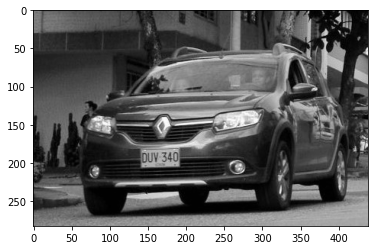

In [11]:
imagen=cv2.imread('image5A.jpg') #Se lee la imagen
gris=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #CV2 lee la imagen en código BGR y luego lo pasamos a gris
plt.imshow(cv2.cvtColor(gris, cv2.COLOR_BGR2RGB)) #Se transforma la imagen a formato RGB ya que es el formato esperado por matplotlib y se muestra

**2. Aplicar filtros y encontrar bordes para localizar la información importante**

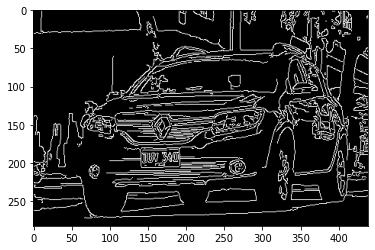

In [12]:
filtradoBilateral=cv2.bilateralFilter(gris, 11, 17, 17) #Reducción de ruido en la imagen
imagenBordeada=cv2.Canny(filtradoBilateral, 30, 200) #Detectar bordes en la imagen con el algoritmo Canny
plt.imshow(cv2.cvtColor(imagenBordeada, cv2.COLOR_BGR2RGB)) #Se muestra la imagen sin ruido y con solo sus bordes

**3. Encontrar contornos y aplicar máscara**

In [13]:
puntosClave=cv2.findContours(imagenBordeada.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Encontramos los contornos.
contornos=imutils.grab_contours(puntosClave) #Se obtienen los contornos de la imagen.
contornos=sorted(contornos, key=cv2.contourArea, reverse=True)[:10] #Se toma los contornos más grandes.

In [25]:
ubicacion=None
#Se itera entre los contornos obtenidos en la sección anterior
for contorno in contornos:                      
    aprox=cv2.approxPolyDP(contorno, 10, True)
    if len(aprox)==10:                         #La longitud corresponde con el número de vertices de la figura
        #Se selecciona el primer contorno que corresponda a un cuadrilátero/rectángulo.                           
        ubicacion=aprox
ubicacion

array([[[271,   0]],

       [[272,  52]],

       [[323,  42]],

       [[363,  50]],

       [[364,  64]],

       [[364,  11]],

       [[372,  36]],

       [[386,  31]],

       [[365,  10]],

       [[359,  42]],

       [[340,  33]],

       [[312,  52]],

       [[273,  52]]], dtype=int32)

In [26]:
for contorno in contornos:
    print(len(cv2.approxPolyDP(contorno, 10, True)))

15
7
3
3
16
4
13
3
5
32


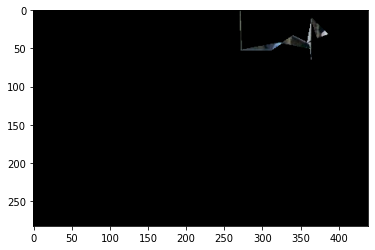

In [27]:
mascara=np.zeros(gris.shape, np.uint8) #Se crea una máscara vacía con el mismo tamaño de la imagen original
nuevaImagen=cv2.drawContours(mascara, [ubicacion], 0, 255, -1) #Se dibujan esos contornos sobre la máscara
nuevaImagen=cv2.bitwise_and(imagen, imagen, mask=mascara) #Se sobrepone la máscara sobre la imagen original
plt.imshow(cv2.cvtColor(nuevaImagen, cv2.COLOR_BGR2RGB)) #Se muestra el resultado

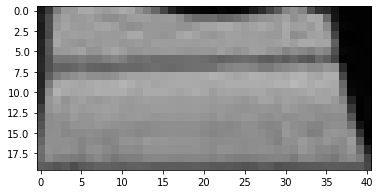

In [18]:
(x,y)=np.where(mascara==255) #Se halla la ubicación dentro de la imagen donde se encuentra la placa
(x1,y1)=(np.min(x),np.min(y)) #Se halla el valor mínimo de las coordenadas horizontales y verticales
(x2,y2)=(np.max(x),np.max(y)) #Se halla el valor máximo de las coordenadas horizontales y verticales
imagenRecortada=gris[x1:x2+1,y1:y2+1] #Se extrae la región de la imagen donde se encuentra la placa
plt.imshow(cv2.cvtColor(imagenRecortada, cv2.COLOR_BGR2RGB)) #Se muestra el resultado

**4. Usar EasyOCR para leer el texto**

In [19]:
reader = easyocr.Reader(['es'])
resultado = reader.readtext(imagenRecortada)
resultado

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]

**5. Separar el resultado**

In [ ]:
texto=resultado[0][-2]
texto

'EGX 799'